In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

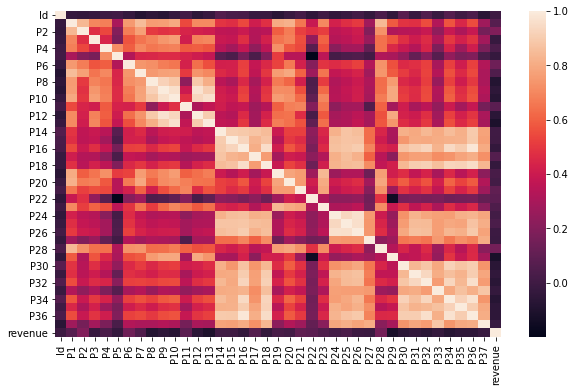

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

In [9]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [10]:
data['City'].value_counts

<bound method IndexOpsMixin.value_counts of 0        İstanbul
1          Ankara
2      Diyarbakır
3           Tokat
4       Gaziantep
          ...    
132       Trabzon
133         İzmir
134       Kayseri
135      İstanbul
136      İstanbul
Name: City, Length: 137, dtype: object>

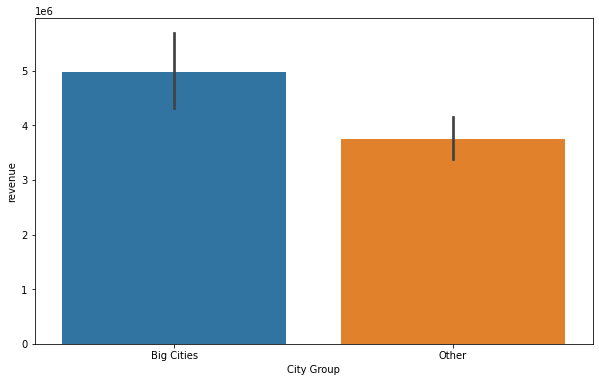

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='City Group',y='revenue',data= data)

In [ ]:
def year(x):
    o=int(x[6:])
    return o
def month(x):
    o=int(x[3:5])
    return o
def day(x):
    o=int(x[0:2])
    return o
df['year']=df['Open Date'].apply(year)
df['month']=df['Open Date'].apply(month)
df['day']=df['Open Date'].apply(day)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='revenue',data= df)

In [ ]:
df.head()

In [11]:
#Converting Open_Date into day count
#Considering the same date the dataset was made available
data['Days_Open'] = (pd.to_datetime('2015-03-23') - pd.to_datetime(data['Open Date'])).dt.days

#Removing unused columns
data = data.drop('Type', axis=1)
data = data.drop('City Group', axis=1)
data = data.drop('City', axis=1)
data = data.drop('Open Date', axis=1)

#Adjusting test data as well
test_data['Type_IL'] = np.where(test_data['Type'] == 'IL', 1, 0)
test_data['Type_FC'] = np.where(test_data['Type'] == 'FC', 1, 0)
test_data['Type_DT'] = np.where(test_data['Type'] == 'DT', 1, 0)
test_data['Big_Cities'] = np.where(test_data['City Group'] == 'Big Cities', 1, 0)
test_data['Days_Open'] = (pd.to_datetime('2015-03-23') - pd.to_datetime(test_data['Open Date'])).dt.days
test_data = test_data.drop('Type', axis=1)
test_data = test_data.drop('City Group', axis=1)
test_data = test_data.drop('City', axis=1)
test_data = test_data.drop('Open Date', axis=1)

In [12]:
data.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days_Open
0,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,5728
1,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2594
2,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,744
3,3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,1145
4,4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2144


In [13]:
test_data.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Type_IL,Type_FC,Type_DT,Big_Cities,Days_Open
0,0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0.0,0.0,2.0,0.0,5.0,5.0,3.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1521
1,1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1466
2,2,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,509
3,3,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0.0,0.0,0.0,4.0,4.0,4.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,686
4,4,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,600


In [14]:
X = data.drop(['Id', 'revenue'], axis=1)
y = data['revenue']

In [15]:
#Testing and Splitting your Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
predictions = lm.predict( x_test)

In [17]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2052409.110719066
MSE: 10195858139011.121
RMSE: 3193095.3852040065


In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X,y).coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296840838849380.2, tolerance: 90251570180.51764
  positive)


array([ 3.09987275e+05,  1.59719072e+05, -8.56047828e+04, -6.63606412e+02,
       -4.36048826e+04,  2.54631172e+05,  7.35413327e+04, -1.20539180e+06,
        1.45910505e+06, -6.11863238e+05, -1.81505400e+05, -1.61946470e+05,
       -1.66641988e+05, -2.03323614e+05, -2.11013325e+05, -4.74841765e+05,
        3.20147105e+05,  3.99289669e+05, -9.81678045e+04, -3.43037097e+05,
        1.06232119e+05, -3.45699129e+05,  1.31827056e+05,  7.19645934e+05,
        2.93681489e+05, -1.25601104e+06,  1.10788525e+05,  6.12876674e+05,
       -8.16163186e+04,  5.21679202e+04,  1.29802942e+05, -2.72675483e+05,
       -2.65338579e+05,  5.49458932e+03, -6.28958817e+04,  5.89077222e+05,
        2.48566293e+04,  4.88943567e+02])

In [19]:
lasso_predictions = lasso.predict(x_test)


In [20]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))

RMSE: 2683971.4262824003
